In [ ]:
!pip install jcopdl==1.1.1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00
  Created wheel for jcopdl: filename=jcopdl-1.1.1-py2.py3-none-any.whl size=12586 sha256=4d3890d738c93a2ccc6390585fd32d0ee2bbf1cf556e42357991b9b948d50587
  Stored

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1DwVJORPgMQgiIBI6tjZDjRgv_ssy2QcR

Downloading...
From (original): https://drive.google.com/uc?id=1DwVJORPgMQgiIBI6tjZDjRgv_ssy2QcR
From (redirected): https://drive.google.com/uc?id=1DwVJORPgMQgiIBI6tjZDjRgv_ssy2QcR&confirm=t&uuid=78493b6c-b258-401c-b139-87d1dbc045c4
To: /content/data.zip
100% 34.0M/34.0M [00:00<00:00, 75.1MB/s]


In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
   creating: data/test/
   creating: data/test/cardboard/
  inflating: data/test/cardboard/cardboard_321.jpg  
  inflating: data/test/cardboard/cardboard_322.jpg  
  inflating: data/test/cardboard/cardboard_323.jpg  
  inflating: data/test/cardboard/cardboard_324.jpg  
  inflating: data/test/cardboard/cardboard_325.jpg  
  inflating: data/test/cardboard/cardboard_326.jpg  
  inflating: data/test/cardboard/cardboard_327.jpg  
  inflating: data/test/cardboard/cardboard_328.jpg  
  inflating: data/test/cardboard/cardboard_329.jpg  
  inflating: data/test/cardboard/cardboard_330.jpg  
  inflating: data/test/cardboard/cardboard_331.jpg  
  inflating: data/test/cardboard/cardboard_332.jpg  
  inflating: data/test/cardboard/cardboard_333.jpg  
  inflating: data/test/cardboard/cardboard_334.jpg  
  inflating: data/test/cardboard/cardboard_335.jpg  
  inflating: data/test/cardboard/cardboard_336.jpg  
  inflating: data/test/cardboard/cardboard_337.

In [ ]:
import jcopdl
jcopdl.__version__

'1.1.1'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback
from jcopdl.callback import set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Dataser & data loader

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:

bs = 128 #bacth size
crop_size = 64

train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(crop_size, scale=(0.7, 1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = datasets.ImageFolder("/content/data/train", transform=train_transform)
train_loader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=0)

test_set = datasets.ImageFolder("/content/data/test", transform=test_transform)
test_loader = DataLoader(test_set, batch_size=bs, shuffle=True, num_workers=0)

In [ ]:
feature, target = next(iter(train_loader))
feature.shape

torch.Size([128, 3, 64, 64])

In [ ]:
label2cat = train_set.classes
label2cat

['cardboard', 'glass', 'metal', 'paper', 'plastic']

Arsitektur dan config

In [ ]:
from jcopdl.layers import conv_block, linear_block
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            conv_block(3, 8),
            conv_block(8, 16),
            conv_block(16, 32),
            conv_block(32, 64),
            nn.Flatten(),
        )

        self.fc = nn.Sequential(
            linear_block(1024, 256, dropout=0.1),
            linear_block(256, 5, activation="lsoftmax")
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

In [ ]:
config = set_config({
    "batch_size" : bs,
    "crop_size" : crop_size,
})

Training Preparation >> MCOC

In [ ]:
model = CNN()
model = model.to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="/content/model")

Training

In [ ]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 1.5883 | Test_cost  = 1.5347 | Train_score = 0.2562 | Test_score = 0.4250 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 1.4496 | Test_cost  = 1.2921 | Train_score = 0.4113 | Test_score = 0.4650 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 1.3296 | Test_cost  = 1.2531 | Train_score = 0.4275 | Test_score = 0.4725 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 1.2959 | Test_cost  = 1.2394 | Train_score = 0.4450 | Test_score = 0.5025 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 1.2234 | Test_cost  = 1.1751 | Train_score = 0.4631 | Test_score = 0.5350 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 1.1712 | Test_cost  = 1.1591 | Train_score = 0.5088 | Test_score = 0.5525 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 1.1339 | Test_cost  = 1.1521 | Train_score = 0.5306 | Test_score = 0.5450 |
==> EarlyStop patience =  1 | Best test_score: 0.5525


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 1.0921 | Test_cost  = 1.0895 | Train_score = 0.5587 | Test_score = 0.5525 |
==> EarlyStop patience =  2 | Best test_score: 0.5525


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 1.0569 | Test_cost  = 1.0393 | Train_score = 0.5787 | Test_score = 0.5775 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 1.0134 | Test_cost  = 1.0604 | Train_score = 0.6000 | Test_score = 0.5850 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 1.0272 | Test_cost  = 1.0479 | Train_score = 0.5956 | Test_score = 0.5925 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.9920 | Test_cost  = 1.0811 | Train_score = 0.6156 | Test_score = 0.5500 |
==> EarlyStop patience =  1 | Best test_score: 0.5925


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.9940 | Test_cost  = 1.0691 | Train_score = 0.6106 | Test_score = 0.5950 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.9600 | Test_cost  = 0.9684 | Train_score = 0.6494 | Test_score = 0.6325 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.9085 | Test_cost  = 0.9741 | Train_score = 0.6538 | Test_score = 0.6200 |
==> EarlyStop patience =  1 | Best test_score: 0.6325


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.8845 | Test_cost  = 0.9744 | Train_score = 0.6631 | Test_score = 0.6375 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.8719 | Test_cost  = 0.9859 | Train_score = 0.6650 | Test_score = 0.6225 |
==> EarlyStop patience =  1 | Best test_score: 0.6375


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.8488 | Test_cost  = 0.9267 | Train_score = 0.6750 | Test_score = 0.6625 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.8391 | Test_cost  = 0.9911 | Train_score = 0.6863 | Test_score = 0.6250 |
==> EarlyStop patience =  1 | Best test_score: 0.6625


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.8175 | Test_cost  = 0.9313 | Train_score = 0.6906 | Test_score = 0.6500 |


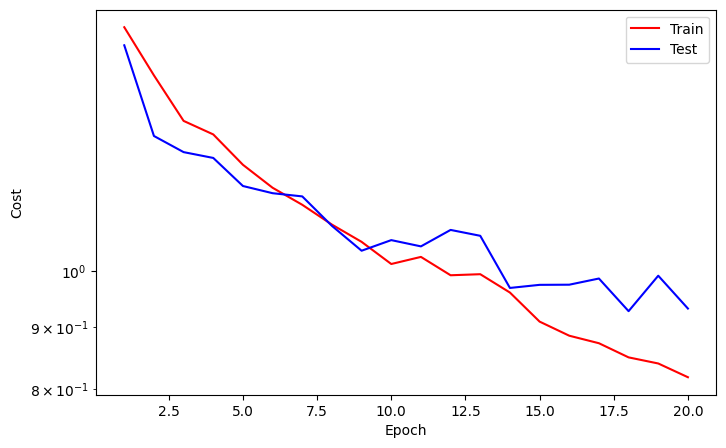

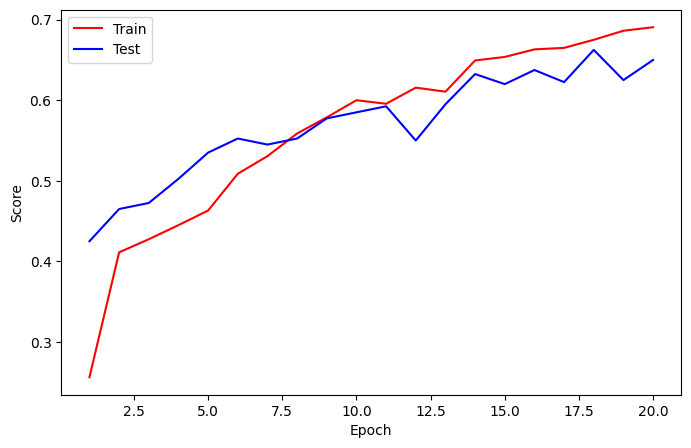

==> EarlyStop patience =  2 | Best test_score: 0.6625


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.8152 | Test_cost  = 0.9013 | Train_score = 0.7013 | Test_score = 0.6725 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.8189 | Test_cost  = 0.9562 | Train_score = 0.7031 | Test_score = 0.6625 |
==> EarlyStop patience =  1 | Best test_score: 0.6725


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.8359 | Test_cost  = 0.8895 | Train_score = 0.6869 | Test_score = 0.6700 |
==> EarlyStop patience =  2 | Best test_score: 0.6725


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.7828 | Test_cost  = 0.9384 | Train_score = 0.7087 | Test_score = 0.6450 |
==> EarlyStop patience =  3 | Best test_score: 0.6725


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.7585 | Test_cost  = 0.8599 | Train_score = 0.7131 | Test_score = 0.6900 |


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.7546 | Test_cost  = 0.9127 | Train_score = 0.7131 | Test_score = 0.6850 |
==> EarlyStop patience =  1 | Best test_score: 0.6900


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.7475 | Test_cost  = 0.8901 | Train_score = 0.7275 | Test_score = 0.6600 |
==> EarlyStop patience =  2 | Best test_score: 0.6900


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.7147 | Test_cost  = 0.8989 | Train_score = 0.7350 | Test_score = 0.6600 |
==> EarlyStop patience =  3 | Best test_score: 0.6900


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.7282 | Test_cost  = 0.8629 | Train_score = 0.7262 | Test_score = 0.6750 |
==> EarlyStop patience =  4 | Best test_score: 0.6900


Train:   0%|          | 0/13 [00:00<?, ?it/s]

Test:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.6929 | Test_cost  = 0.8557 | Train_score = 0.7469 | Test_score = 0.6900 |
==> EarlyStop patience =  5 | Best test_score: 0.6900
==> Execute Early Stopping at epoch: 30 | Best test_score: 0.6900
==> Best model is saved at /content/model


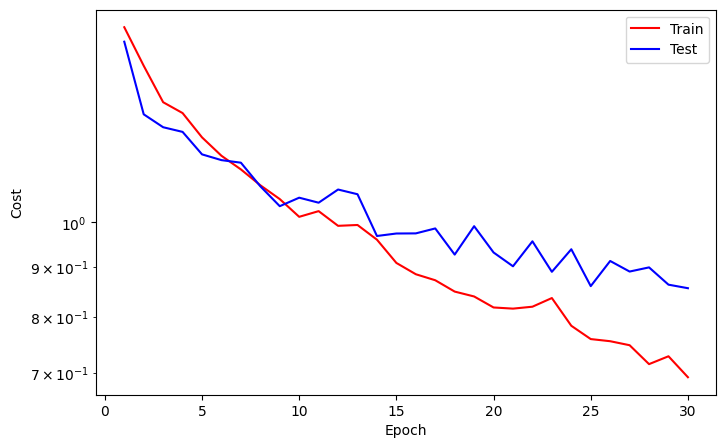

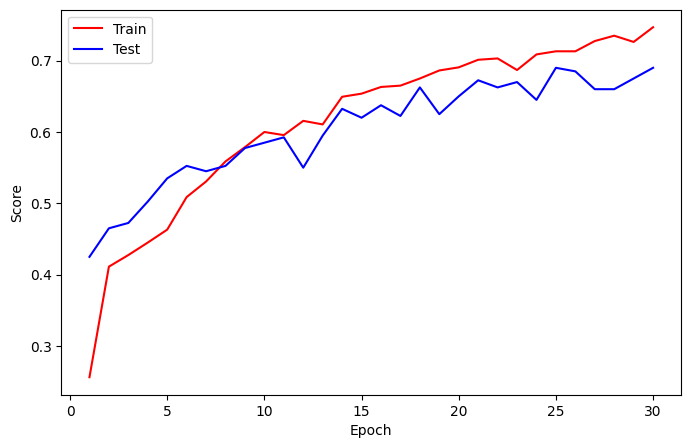

In [ ]:
while True:
    train_cost, train_score = loop_fn("train", train_set, train_loader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, test_loader, model, criterion, optimizer, device)

    #Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    #Checkpoint
    callback.save_checkpoint()

    #Runntime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    #Early stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break


Predict

In [ ]:
feature, target = next(iter(test_loader))
feature, target = feature.to(device), target.to(device)


In [ ]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

tensor([0, 1, 4, 1, 0, 1, 2, 1, 2, 0, 3, 1, 1, 4, 1, 3, 0, 1, 4, 1, 2, 3, 1, 1,
        1, 3, 3, 4, 1, 4, 0, 3, 3, 4, 0, 2, 1, 1, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2,
        0, 4, 2, 3, 3, 1, 3, 2, 1, 3, 3, 3, 3, 0, 2, 3, 1, 0, 2, 0, 0, 1, 0, 2,
        2, 3, 1, 4, 1, 2, 0, 2, 1, 0, 1, 2, 3, 0, 0, 3, 0, 4, 1, 4, 2, 0, 0, 2,
        1, 1, 4, 4, 0, 4, 0, 3, 0, 0, 4, 4, 3, 2, 0, 4, 2, 3, 4, 3, 4, 2, 1, 0,
        0, 1, 0, 3, 0, 4, 4, 3], device='cuda:0')

In [ ]:
def inverse_norm(img):
  img[0, :, :] = img[0, :, :] * 0.229 + 0.485
  img[1, :, :] = img[1, :, :] * 0.224 + 0.456
  img[2, :, :] = img[2, :, :] * 0.225 + 0.406
  return img

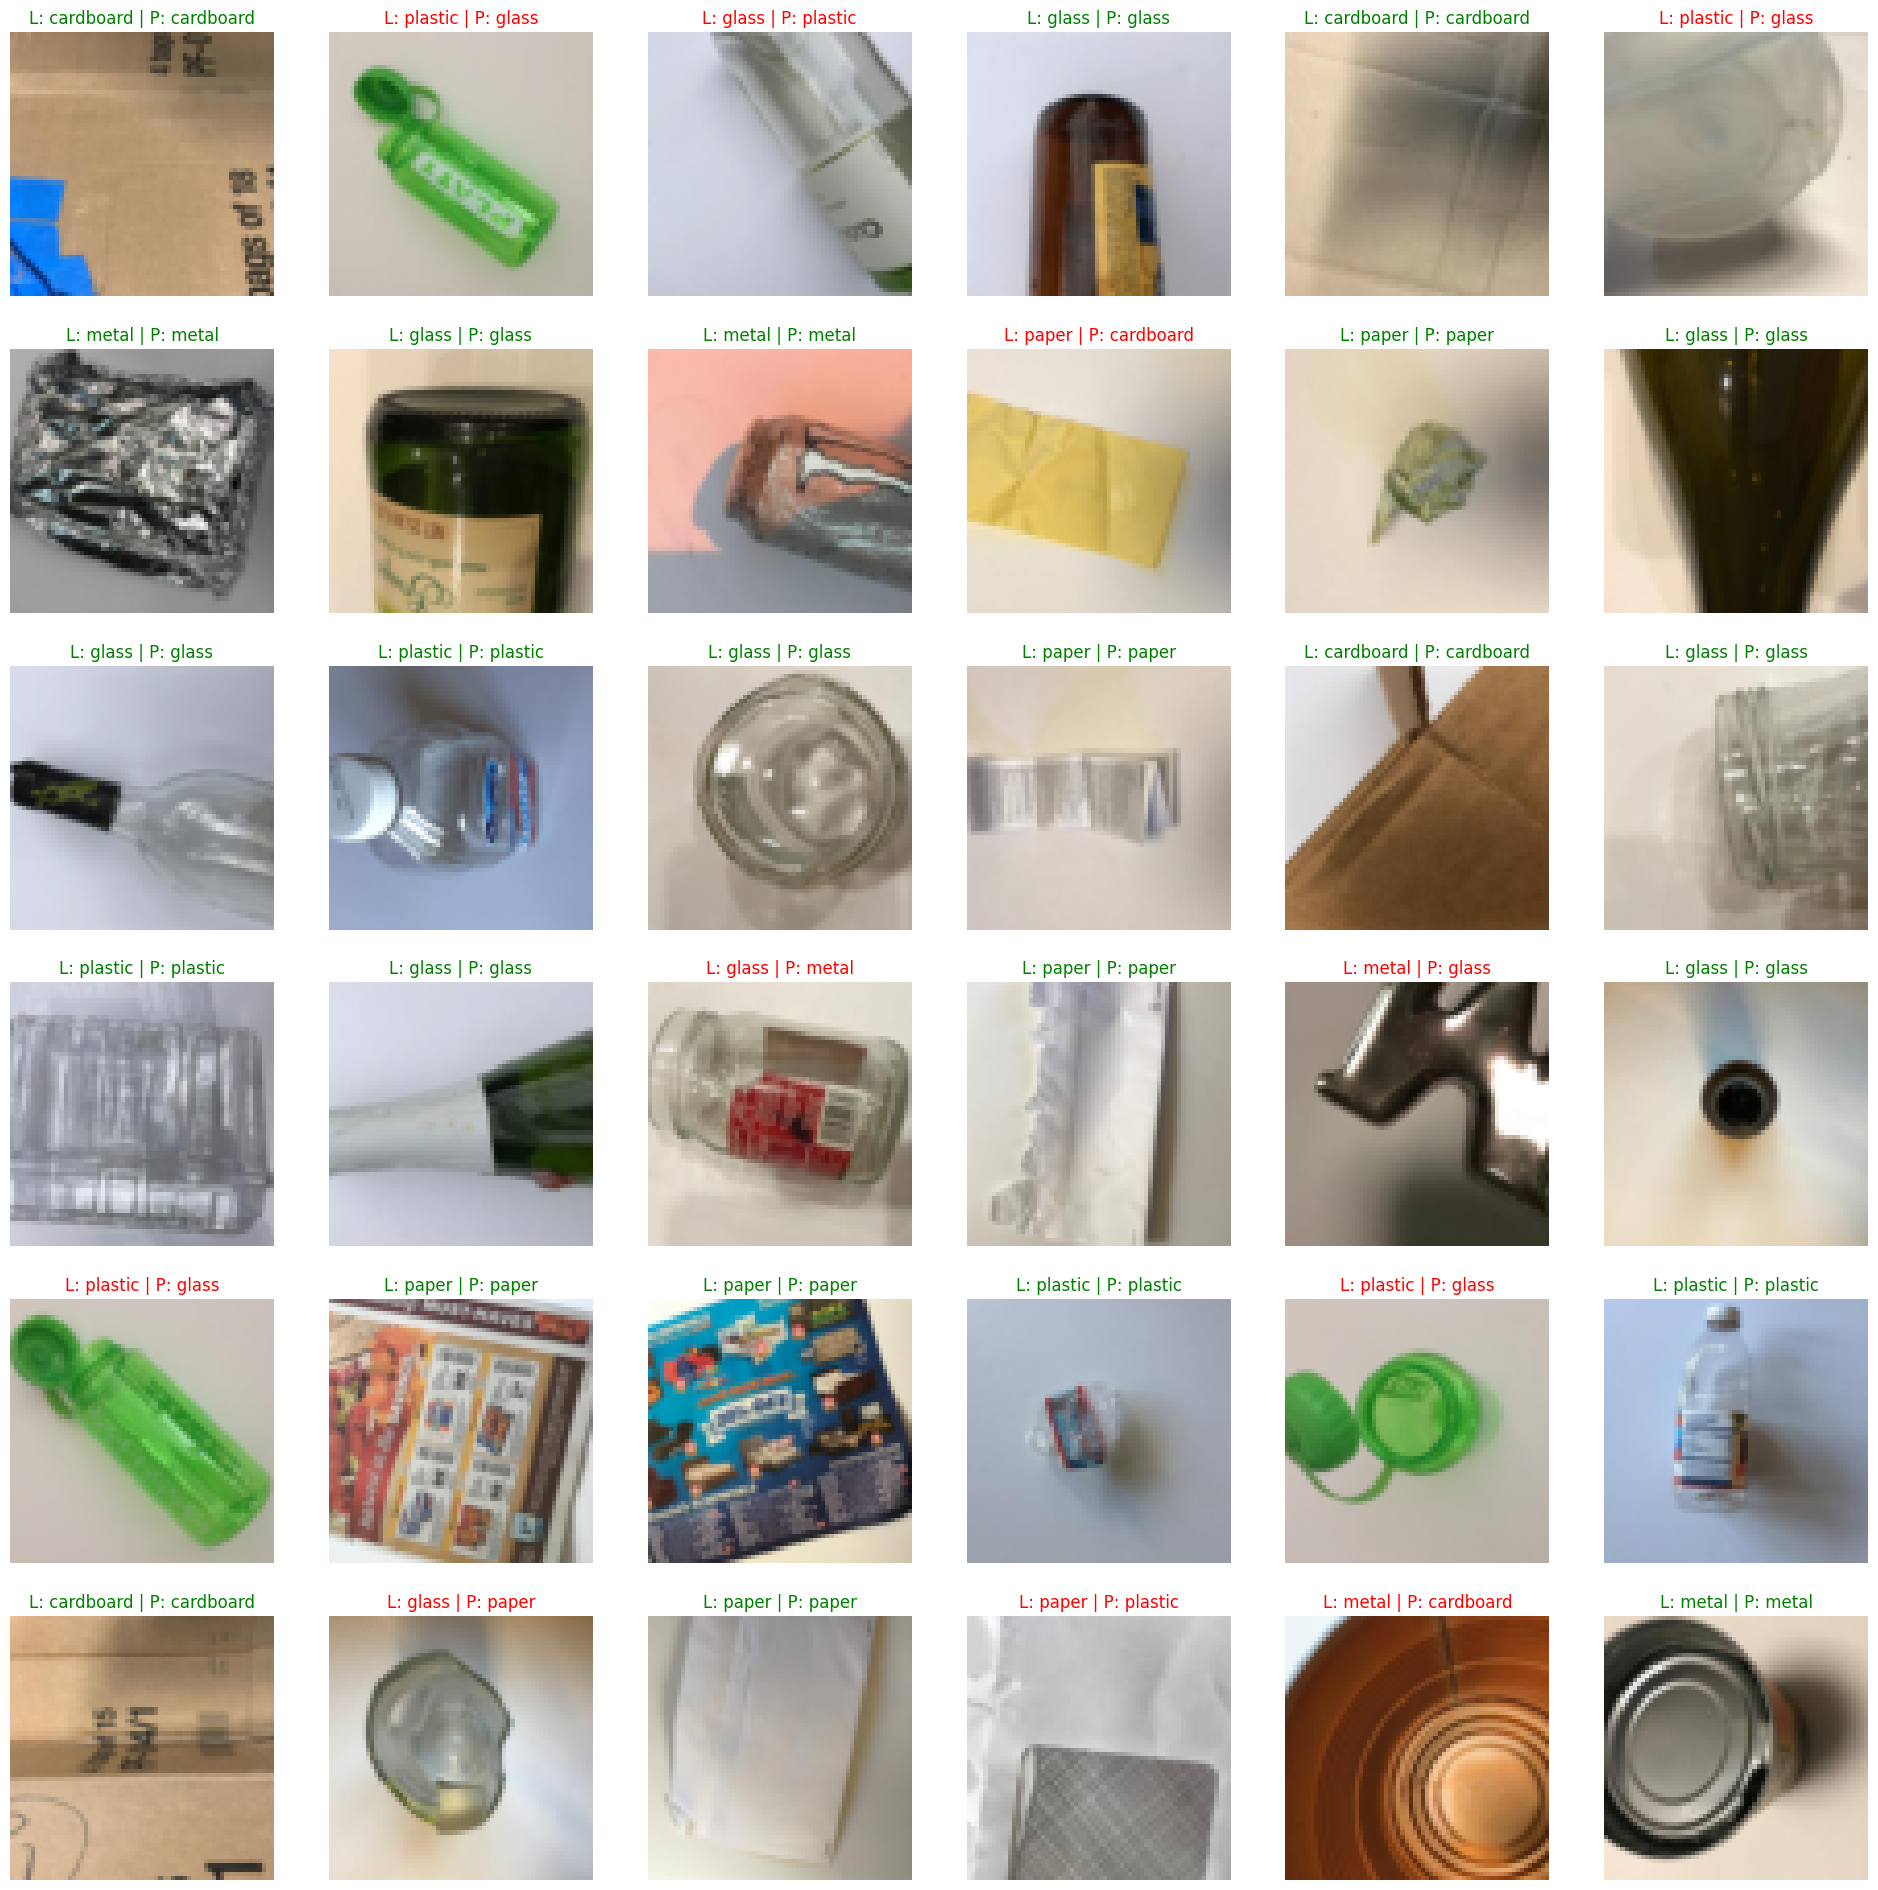

In [ ]:
fig, axes = plt.subplots(6,6, figsize=(24,24))
for image, label, pred, ax in zip(feature, target, preds, axes.flatten ()):
    ax.imshow(inverse_norm(image).permute(1,2,0).cpu())
    font = {"color": 'r'} if label != pred else {"color": 'g'}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"L: {label} | P: {pred}", fontdict=font);
    ax.axis('off');

In [ ]:
import shutil

# Path folder yang ingin dikompres
folder_path = '/content/model'

# Nama file zip yang akan dibuat
zip_file_path = '/content/model.zip'

# Membuat file zip
shutil.make_archive(base_name=zip_file_path.replace('.zip', ''), format='zip', root_dir=folder_path)

print(f'Folder "{folder_path}" telah berhasil dikompres menjadi: {zip_file_path}')

Folder "/content/model" telah berhasil dikompres menjadi: /content/model.zip


In [ ]:
!gdown https://drive.google.com/uc?id=1WaVN1M7IlqiqeO-Op9BO_N3YlMziuo2m
!unzip /content/model_CNN.zip

Downloading...
From: https://drive.google.com/uc?id=1WaVN1M7IlqiqeO-Op9BO_N3YlMziuo2m
To: /content/model_CNN.zip
100% 1.07M/1.07M [00:00<00:00, 100MB/s]
Archive:  /content/model_CNN.zip
  inflating: model/configs.pth       
  inflating: model/logs.pth          
  inflating: model/weights_best.pth  


In [ ]:
import os

model = CNN()
model = model.to(device)
checkpoint_path = "/content/model/weights_best.pth"

if os.path.exists(checkpoint_path):
    print("✅ Model checkpoint ditemukan. Memuat model...")
    model.load_state_dict(torch.load(checkpoint_path, map_location=device))
    model.eval()
    skip_training = True
else:
    print("⚠️  Model belum ditemukan. Akan dilakukan training...")
    skip_training = False

criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="/content/model")


✅ Model checkpoint ditemukan. Memuat model...


In [ ]:
from google.colab import files
from PIL import Image
import io

Saving glass_332.jpg to glass_332.jpg
User uploaded file "glass_332.jpg" with length 16288 bytes
Prediction: glass


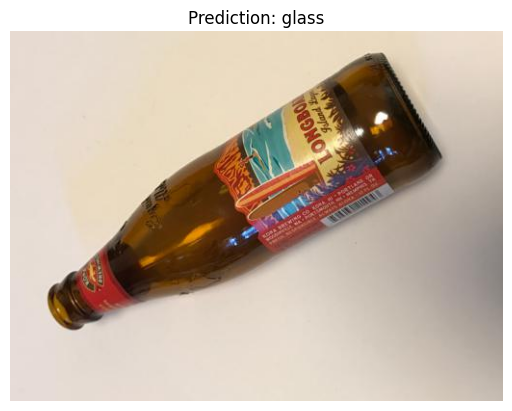

In [ ]:
# %% [markdown]
# Predict with Uploaded Image
# %%
def predict_uploaded_image(model, transform, label2cat, device):
    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

        # Read image from bytes
        img = Image.open(io.BytesIO(uploaded[fn])).convert('RGB')

        # Apply transformations
        img_tensor = transform(img).unsqueeze(0).to(device)

        # Make prediction
        with torch.no_grad():
            model.eval()
            output = model(img_tensor)
            pred_idx = output.argmax(1).item()
            prediction = label2cat[pred_idx]

        print(f"Prediction: {prediction}")

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"Prediction: {prediction}")
        plt.axis('off')
        plt.show()

# Panggil fungsi untuk mengunggah dan memprediksi
predict_uploaded_image(model, test_transform, label2cat, device)